In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, rdmolops, AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import MACCSkeys

# sklearn ML models
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import  LGBMRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'
import joblib
from scipy.stats import pearsonr


/Users/liugrp_m/anaconda3/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Experimental optical gap

## database-1096dp

In [42]:
df=pd.read_csv('../database-1096dp/raw/conjugated-polymer-1096dp.csv')
df_1096 = df[['bandgap(eV)', 'smiles_monomer']]
df_1096

,bandgap(eV),smiles_monomer
0,1.93,CCCCCCc1cc(C)sc1C
1,1.82,CCCCCCSc1cc(C)sc1C
2,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1
3,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1
4,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1
...,...,...
1091,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...
1092,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...
1093,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...
1094,1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...


## BT

In [43]:
df = pd.read_csv('../new-database-227dp/raw/group1/BT/new-polymer-BT-21dp.csv')
df_bt = df[['bandgap(eV)', 'smiles_monomer']]
df_bt

,bandgap(eV),smiles_monomer
0,1.70,CC(S1)=CC2=C1C(OCC(CCCCCCCCCC)CCCCCCCC)=C(C=C(...
1,1.85,CC(S1)=CC2=C1C(OCC(CCCCCCCCCC)CCCCCCCC)=C(C=C(...
2,1.74,CCCCCCCCC1=C(CCCCCCCC)C=C(S1)C1=C2C=C(SC2=C(C2...
3,1.62,CCCCCCCCCCCCC1=C(C)SC(=C1)C1=CC(F)=C(C2=CC(CCC...
4,1.60,CCCCCCCCCCCCC1=C(C)SC(=C1)C1=CC(Cl)=C(C2=CC(CC...
5,1.57,CC(S1)=CC2=C1C(C3=CC=C(C4=CC=C(C5=CC=C(C(CCCCC...
6,1.56,CC(S1)=CC2=C1C(C3=CC=C(C4=CC=C(C5=CC=C(C(CCCCC...
7,1.59,CC(S1)=CC2=C1C(C3=CC=C(C4=CC=C(C5=CC=C(C(CCCCC...
8,1.62,CCCCCCC1=C(C)SC(=C1)C1=CC=C(C2=CC(CCCCCC)=C(S2...
9,1.65,CCCCCCC1=C(C)SC(=C1)C1=C(F)C=C(C2=CC(CCCCCC)=C...


## BTA

In [44]:
df = pd.read_csv('../new-database-227dp/raw/group1/BTA/new-polymer-BTA-20dp.csv')
df_bta = df[['bandgap(eV)', 'smiles_monomer']]
df_bta

,bandgap(eV),smiles_monomer
0,1.72,CC1=CC2=C(S1)C(C3=CC=C(CC(CCCCCCCCCC)CCCCCCCC)...
1,1.78,CCCCCCCCCCC(CCCCCCCC)CN1N=C2C(=N1)C(=CC=C2C1=C...
2,1.72,CC(S1)=CC2=C1C(OCC(CCCC)CC)=C(C=C(C3=CC=C(C4=C...
3,1.63,CCCCCCCCCCC(CCCCCCCC)CN1N=C2C(=N1)C(=CC=C2C1=C...
4,1.73,CCCCCCCCCCC(CCCCCCCC)CN1N=C2C(=N1)C(=CC=C2C1=C...
5,1.96,CCCCCCCCC(CCCCCC)CN1N=C2C(=N1)C(C1=CC=C(S1)C1=...
6,1.80,CCCCCCCCC(CCCCCC)CN1N=C2C(=N1)C(C1=CC(F)=C(S1)...
7,1.94,CCCCC(CC)CC1=CC=C(S1)C1=C2SC(=CC2=C(C2=CC=C(CC...
8,1.94,CCCCC(CC)CSC1=CC=C(S1)C1=C2C=C(SC2=C(C2=CC=C(S...
9,1.96,CCC[Si](CCC)(CCC)C1=CC=C(S1)C1=C2C=C(SC2=C(C2=...


## QA

In [45]:
df = pd.read_csv('../new-database-227dp/raw/group1/QA/new-polymer-QA-23dp.csv')
df_qa = df[['bandgap(eV)', 'smiles_monomer']]
df_qa

,bandgap(eV),smiles_monomer
0,1.82,CC1=CC2=C(S1)C(OCC(CCCC)CC)=C3C(SC(C4=CC=C(C5=...
1,1.70,CC1=CC2=C(S1)C(OCC(CCCC)CC)=C3C(SC(C4=CC=C(C5=...
2,1.68,CCCCCCCCC1=C(CCCCCCCC)C=C(S1)C1=C2C=C(SC2=C(C2...
3,1.69,CCCCCCCCC1=C(CCCCCCCC)C=C(S1)C1=C2C=C(SC2=C(C2...
4,1.71,CCCCCCCCC1=C(CCCCCCCC)C=C(S1)C1=C2C=C(SC2=C(C2...
5,1.79,CC(S1)=CC2=C1C(C3=CC=C(CC(CCCC)CC)[Se]3)=C(C=C...
6,1.79,CC(S1)=CC2=C1C(C3=CC=C(CC(CCCC)CC)[Se]3)=C(C=C...
7,1.67,CCCCCCCCCCC(CCCCCCCC)CC1=CC=C([Se]1)C1=C2SC(=C...
8,1.45,CC1=CC2=C(S1)C(C3=CC=C(CC(CCCCCCCCCC)CCCCCCCC)...
9,1.64,CC1=CC2=C(S1)C(C3=CC=C(CC(CCCCCCCCCC)CCCCCCCC)...


## DPP: 19dp

In [46]:
df = pd.read_csv('../new-database-227dp/raw/group1/DPP/new-polymer-DPP-19dp.csv')
df_dpp = df[['bandgap(eV)', 'smiles_monomer']]
df_dpp

,bandgap(eV),smiles_monomer
0,1.68,CC(C=C1)=CN=C1C(N(CC(CCCCCCCC)CCCCCCCCCC)C2=O)...
1,1.71,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(N(CC(CCCCCCC...
2,1.35,O=C(N(CCCCCC(OCC(CCCCCCCCCC)CCCCCCCCCCCC)=O)C(...
3,1.43,CCCCCCCCCCCCCCCCCCC(CCCCCCCCCCCCCCCCCC)CCCN1C(...
4,1.40,CCCCCCCCCCCCCCCCCCC(CCCCCCCCCCCCCCCCCC)CCCN1C(...
5,1.73,CC(C=C1)=CN=C1C(N(CC(CCCCCCCCCCCC)CCCCCCCCCC)C...
6,1.46,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(N(CC(CCCCCCC...
7,1.33,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(N(CC(CCCCCCC...
8,1.41,CC1=CC=C(O1)C(N(CCCCCC[Si](O[Si](C)(C)C)(O[Si]...
9,1.39,CC1=CC=C(O1)C(N(CCCCCC[Si](O[Si](C)(C)C)(O[Si]...


## TPD: 20 dp

In [47]:
df = pd.read_csv('../new-database-227dp/raw/group1/TPD/new-polymer-TPD-20dp.csv')
df_tpd = df[['bandgap(eV)', 'smiles_monomer']]
df_tpd

,bandgap(eV),smiles_monomer
0,1.76,O=C(C1=C(C)SC(C2=CC=C(C3=C(CCCCCCCC)C=C(C)S3)S...
1,1.87,O=C(C1=C(C)SC(C2=CC(C(CCCCCCCC)(CCCCCCCC)C3=C4...
2,1.85,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(C)SC(C3=CC4=...
3,1.69,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(SC(C3=CC4=C(...
4,1.79,CC1=C(CCCCCC)C(S2)=C(S1)C=C2C3=C(C(N(CC(CCCCCC...
5,1.89,CC1=C(CCCCCCCC)C(S2)=C(S1)C=C2C3=C(C(N(CC(CCCC...
6,1.87,CCCCCCCCC(CCCCCC)CN1C(=O)C2=C(SC(C3=CC4=C(S3)C...
7,1.87,CC(S1)=CC2=C1C(C3=CC(F)=C(CC(CCCC)CC)S3)=C(C=C...
8,1.89,CC(S1)=CC2=C1C(C3=CC(Cl)=C(CC(CCCC)CC)S3)=C(C=...
9,1.87,CC(S1)=CC2=C1C(C3=CC(SC)=C(CC(CCCC)CC)S3)=C(C=...


## PDI: 28dp

In [48]:
df = pd.read_csv('../new-database-227dp/raw/group2/PDI/new-polymer-PDI-28dp.csv')
df_pdi = df[['bandgap(eV)', 'smiles_monomer']]
df_pdi

,bandgap(eV),smiles_monomer
0,2.010,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=CC=C3C4=C5...
1,1.560,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=CC=C3C4=C(...
2,1.280,O=C1C2=CC(C3=CC=C(C4=C5C(C(N4CCCCCCCC)=O)=C(C6...
3,1.460,O=C1C2=CC=C(C3=C(C)C=C(C(N(CC(CCCCCCCCCCCC)CCC...
4,1.600,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=CC(C)=C3C4...
5,1.960,CCCCCCC1=CC=C(C=C1)C1(C2=C(SC(C)=C2)C2=CC3=C(C...
6,1.770,O=C1C2=CC(C3=CC(N(C(CCCCCCCC)CCCCCCCC)C4=C5C=C...
7,1.780,CCCCCCC(CCCCCC)N1C(=O)C2=CC(C)=C3C4=CC=C5C(=O)...
8,1.650,O=C1C2=CC(C)=C(C3=CC=C(C(N(C(CCCCC)CCCCC)C4=O)...
9,1.680,O=C1C2=CC(C)=C(C3=CC=C(C(N(C(CCCCCC)CCCCCC)C4=...


## NDI: 26dp

In [49]:
df = pd.read_csv('../new-database-227dp/raw/group2/NDI/new-polymer-NDI-26dp.csv')
df_ndi = df[['bandgap(eV)', 'smiles_monomer']]
df_ndi

,bandgap(eV),smiles_monomer
0,1.00,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=CC(C3=CC=C...
1,1.87,CCCCCCCCC(CCCCCCCC)N1C2=CC(=CC=C2C2=C1C=C(C)C=...
2,1.45,O=C1C2=C(C)C=C(C(N(CC(CCCCCCCCCC)CCCCCCCC)C3=O...
3,1.40,O=C1C2=CC(C)=C(C(N(CC(CCCCCCCCCC)CCCCCCCC)C3=O...
4,1.36,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=CC(C)=C3C(=O)N...
5,1.71,O=C1C2=C(C)C=C(C(N(CCCC(CCCCCC)CCCCCC)C3=O)=O)...
6,2.02,CCCCC(CC)CN1C(=O)C2=CC(C)=C3C(=O)N(CC(CC)CCCC)...
7,2.10,O=C1C2=C(C3=CC(C(CCCCCCCC)(CCCCCCCC)C4=C5C=CC(...
8,1.59,CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=CC(C)=C3C(=O)N...
9,1.50,O=C1C2=C(C3=CC=C(C)S3)C=C(C(N(CC(CCCCCCCC)CCCC...


## DTBT: 20dp

In [50]:
df = pd.read_csv('../new-database-227dp/raw/group2/DTBT/new-polymer-DTBT-20dp.csv')
df_dtbt = df[['bandgap(eV)', 'smiles_monomer']]
df_dtbt

,bandgap(eV),smiles_monomer
0,1.98,CC(S1)=CC2=C1C(C3=CC(F)=C(CC(CCCC)CC)S3)=C(C=C...
1,1.99,CC(S1)=CC2=C1C(C3=CC(Cl)=C(CC(CCCC)CC)S3)=C(C=...
2,2.06,CC1=CC2=C(S1)C(C3=CC(F)=C(CC(CCCC)CC)S3)=C4C(S...
3,1.96,CC1=CC2=C(S1)C(C3=CC=C(CC(CCCC)CC)S3)=C4C(SC(C...
4,1.97,CC1=CC2=C(S1)C(C3=CC=C(CC(CCCC)CC)S3)=C4C(SC(C...
5,1.95,CC(O1)=CC2=C1C(C3=CC(Cl)=C(CC(CCCC)CC)S3)=C(C=...
6,2.01,CCCCCCC(CCCC)CC1=C(SC(=C1)C1=CC2=C(S1)C1=C(C=C...
7,1.86,CCCCCCC(CCCC)CC1=C(SC(=C1)C1=CC2=C(S1)C1=C(C=C...
8,1.92,CC1=CC2=C(S1)C(C3=CC(F)=C(CC(CCCC)CC)S3)=C4C(S...
9,1.89,CC1=CC2=C(S1)C(C3=CC(F)=C(CC(CCCC)CC)S3)=C4C(S...


## BBX: 21dp

In [52]:
df = pd.read_csv('../new-database-227dp/raw/group2/BBX/new-polymer-BBX-21dp.csv')
df_bbx = df[['bandgap(eV)', 'smiles_monomer']]
df_bbx

,bandgap(eV),smiles_monomer
0,1.86,CCCCCCCCC1=NC2=C(O1)C(C1=CC3=C(S1)C1=C(C=C(C)S...
1,1.90,CCCCCCCCC1=NC2=C(O1)C(C1=CC=C(S1)C1=CC3=C(S1)C...
2,1.95,CCCCCCCCC1=NC2=C(O1)C(C1=CC(CCCCCCCC)=C(S1)C1=...
3,2.72,CCCCCCCCN1C2=CC=C(C=C2C2=CC(=CC=C12)C#CC1=C2OC...
4,2.69,CCCCCCC1=NC2=C(O1)C(C)=C1N=C(CCCCCC)OC1=C2C#CC...
5,2.72,CCCCCCCCC1(CCCCCCCC)C2=CC(=CC=C2C2=CC=C(C=C12)...
6,2.76,CCCCCCC1=NC2=C(O1)C(C)=C1N=C(CCCCCC)OC1=C2C#CC...
7,2.36,CCCCCCCCCCCCOC1=CC(C#CC)=C(OCCCCCCCCCCCC)C=C1C...
8,2.44,CCCCCCC1=NC2=C(O1)C(C)=C1N=C(CCCCCC)OC1=C2C#CC...
9,2.16,CCCCCCCCC(CCCCCC)CC1=C(C)SC(=C1)C1=NC2=CC3=C(C...


## Y6: 20dp

In [53]:
df = pd.read_csv('../new-database-227dp/raw/group2/Y6/new-polymer-Y6-29dp.csv')
df_y6 = df[['bandgap(eV)', 'smiles_monomer']]
df_y6

,bandgap(eV),smiles_monomer
0,1.481,CCCCCCCCC(CCCCCC)CN1C2=C(SC3=C2SC(\C=C2/C(=O)C...
1,1.370,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C2=C(SC3=C2SC(\C=C...
2,1.411,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C2=C(SC3=C2SC(\C=C...
3,1.385,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C2=C(SC3=C2SC(\C=C...
4,1.393,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C2=C(SC3=C2SC(\C=C...
5,1.375,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C2=C(SC3=C2[Se]C(\...
6,1.487,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCCCCCC)CCCC...
7,1.490,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCCCCCC)CCCC...
8,1.440,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCCCCCC)CCCC...
9,1.372,FC1=C(C)C(F)=CC2=C1C(C(/C2=C(C#N)\C#N)=C\C(S3)...


## rap up

In [54]:
df_exp = pd.concat([df_1096, df_bt, df_bta, df_qa, df_dpp, df_tpd, df_pdi, df_ndi, df_dtbt, df_bbx, df_y6], axis = 0)
df_exp = df_exp.reset_index(drop=True)
df_exp

,bandgap(eV),smiles_monomer
0,1.930,CCCCCCc1cc(C)sc1C
1,1.820,CCCCCCSc1cc(C)sc1C
2,1.760,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1
3,1.920,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1
4,1.890,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1
...,...,...
1318,1.333,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCC)CCCCCC)C...
1319,1.440,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCC)CCCCCC)C...
1320,1.442,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCC)CCCCCC)C...
1321,1.449,O=C1C2=C(C=C(C3=C(CC(CC)CCCC)C=C(C4=NC=C(C5=CC...


# DFT HOMO-LUMO gap

## database-1096dp

In [55]:
df = pd.read_csv('../database-1096dp/raw/oligomer-DFT-TDDFT-calculations-1096dp.csv')
scf_1096 = df[['HOMO-LUMO-B3LYP(eV)']]
scf_1096 = scf_1096.rename(columns={'HOMO-LUMO-B3LYP(eV)':'HOMO-LUMO(eV)'})
scf_1096

,HOMO-LUMO(eV)
0,2.78726
1,2.72032
2,3.19979
3,2.69964
4,2.66372
...,...
1091,1.93038
1092,1.93065
1093,2.04439
1094,1.94561


## BT

In [56]:
df = pd.read_csv('../new-database-227dp/raw/group1/BT/oligomer-DFT-BT-21dp.csv')
scf_bt = df[['HOMO-LUMO(eV)']]
scf_bt

,HOMO-LUMO(eV)
0,2.04684
1,2.26589
2,2.03895
3,2.01391
4,2.09500
5,1.96902
6,2.03677
7,2.09473
8,2.00412
9,1.99351


## BTA

In [57]:
df = pd.read_csv('../new-database-227dp/raw/group1/BTA/oligomer-DFT-BTA-20dp.csv')
scf_bta = df[['HOMO-LUMO(eV)']]
scf_bta

,HOMO-LUMO(eV)
0,2.28140
1,2.40385
2,2.37392
3,2.17283
4,2.22752
5,2.73692
6,2.59433
7,2.70454
8,2.71923
9,2.71814


## QA

In [58]:
df = pd.read_csv('../new-database-227dp/raw/group1/QA/oligomer-DFT-QA-23dp.csv')
scf_qa = df[['HOMO-LUMO(eV)']]
scf_qa

,HOMO-LUMO(eV)
0,2.26127
1,1.97772
2,2.21011
3,2.18643
4,2.20956
5,2.23786
6,2.04194
7,2.17310
8,2.16330
9,2.23623


## DPP

In [59]:
df = pd.read_csv('../new-database-227dp/raw/group1/DPP/oligomer-DFT-DPP-19dp.csv')
scf_dpp = df[['HOMO-LUMO(eV)']]
scf_dpp

,HOMO-LUMO(eV)
0,2.34344
1,2.37827
2,2.22181
3,2.19514
4,2.05609
5,2.44249
6,2.25065
7,2.07786
8,1.90942
9,1.89500


## TPD

In [60]:
df = pd.read_csv('../new-database-227dp/raw/group1/TPD/oligomer-DFT-TPD-20dp.csv')
scf_tpd = df[['HOMO-LUMO(eV)']]
scf_tpd

,HOMO-LUMO(eV)
0,2.49664
1,2.32821
2,2.60059
3,2.48794
4,2.55733
5,2.66399
6,2.67325
7,2.72522
8,2.70372
9,2.69229


## PDI

In [61]:
df = pd.read_csv('../new-database-227dp/raw/group2/PDI/oligomer-DFT-PDI-28dp.csv')
scf_pdi = df[['HOMO-LUMO(eV)']]
scf_pdi

,HOMO-LUMO(eV)
0,2.33011
1,1.73990
2,1.49935
3,2.02725
4,2.32793
5,1.67704
6,2.17011
7,2.24657
8,1.95405
9,2.01419


## NDI

In [62]:
df = pd.read_csv('../new-database-227dp/raw/group2/NDI/oligomer-DFT-NDI-26dp.csv')
scf_ndi = df[['HOMO-LUMO(eV)']]
scf_ndi

,HOMO-LUMO(eV)
0,1.42751
1,2.19596
2,2.04357
3,1.93827
4,2.05854
5,2.42671
6,2.12113
7,2.34426
8,1.96167
9,2.04221


## DTBT

In [63]:
df = pd.read_csv('../new-database-227dp/raw/group2/DTBT/oligomer-DFT-DTBT-20dp.csv')
scf_dtbt = df[['HOMO-LUMO(eV)']]
scf_dtbt

,HOMO-LUMO(eV)
0,2.62671
1,2.64168
2,2.78944
3,2.55760
4,2.56712
5,2.55216
6,2.51270
7,2.38589
8,2.55515
9,2.55134


## BBX

In [64]:
df = pd.read_csv('../new-database-227dp/raw/group2/BBX/oligomer-DFT-BBX-21dp.csv')
scf_bbx = df[['HOMO-LUMO(eV)']]
scf_bbx

,HOMO-LUMO(eV)
0,2.42671
1,2.61311
2,2.61311
3,3.10264
4,3.10264
5,2.89447
6,2.89447
7,2.69420
8,2.69420
9,2.96767


## Y6

In [65]:
df = pd.read_csv('../new-database-227dp/raw/group2/Y6/oligomer-DFT-Y6-29dp.csv')
scf_y6 = df[['HOMO-LUMO(eV)']]
scf_y6

,HOMO-LUMO(eV)
0,2.06670
1,2.02126
2,2.06507
3,2.02289
4,2.04058
5,2.03378
6,2.31025
7,2.09038
8,2.02752
9,2.01038


## rap up

In [66]:
df_dft = pd.concat([scf_1096, scf_bt, scf_bta, scf_qa, scf_dpp, scf_tpd, scf_pdi, scf_ndi, scf_dtbt, scf_bbx, scf_y6], axis = 0)
df_dft = df_dft.reset_index(drop=True)
df_dft

,HOMO-LUMO(eV)
0,2.78726
1,2.72032
2,3.19979
3,2.69964
4,2.66372
...,...
1318,1.94072
1319,1.93418
1320,1.96765
1321,2.02670


In [67]:
df_all = pd.concat([df_exp, df_dft], axis = 1)
df_all

,bandgap(eV),smiles_monomer,HOMO-LUMO(eV)
0,1.930,CCCCCCc1cc(C)sc1C,2.78726
1,1.820,CCCCCCSc1cc(C)sc1C,2.72032
2,1.760,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,3.19979
3,1.920,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,2.69964
4,1.890,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,2.66372
...,...,...,...
1318,1.333,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCC)CCCCCC)C...,1.94072
1319,1.440,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCC)CCCCCC)C...,1.93418
1320,1.442,CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCC)CCCCCC)C...,1.96765
1321,1.449,O=C1C2=C(C=C(C3=C(CC(CC)CCCC)C=C(C4=NC=C(C5=CC...,2.02670


# Test set

In [68]:
test_smiles = [
'CC(S1)=C(CC(CCCCCCCCCC)CCCCCCCC)C=C1C(C2=NSN=C23)=C(F)C(F)=C3C(S4)=CC(CC(CCCCCCCC)CCCCCCCCCC)=C4C5=CC6=C(C7=CC=C(SCC(CCCC)CC)C=C7)C8=C(C=C(C)S8)C(C9=CC=C(SCC(CC)CCCC)C=C9)=C6S5'

,'CC1=CC=C(S1)C(C2=NN(CC(CCCCCCCC)CCCCCC)N=C23)=C(F)C(F)=C3C4=CC=C(S4)C5=CC6=C(C7=CC=C(SCC(CCCC)CC)S7)C8=C(C=C(C)S8)C(C9=CC=C(SCC(CC)CCCC)S9)=C6S5'

,'CC1=CC2=C(S1)C(C3=CC=C(CC(CCCCCCCCCC)CCCCCCCC)[Se]3)=C4C(SC(C5=C(CCCCCC)C=C(C6=C(F)C=C(C7=CC(CCCCCC)=C(C)S7)C8=C6N=C(C9=CC=CC=C9)C(C%10=CC=CC=C%10)=N8)S5)=C4)=C2C%11=CC=C(CC(CCCCCCCCCC)CCCCCCCC)[Se]%11'

,'CCCCCCCCCCC(CCCCCCCCCC)CCCN1C(=O)C2=C(N(CCCC(CCCCCCCCCC)CCCCCCCCCC)C(=O)C2=C1C1=CC=C(C)S1)C1=CC=C(S1)C1=CN=C(S1)C1=NC=C(C)S1'

,'CCCCCCCCCCC(CCCCCCCC)CN1C(=O)C2=C(SC(C3=C(F)C(CCCCCCCC)=C(S3)C3=CC4=C(C5=CC=C(CC(CC)CCCC)S5)C5=C(C=C(C)S5)C(C5=CC=C(CC(CC)CCCC)S5)=C4S3)=C2C1=O)C1=C(F)C(CCCCCCCC)=C(C)S1'

,'CCCCCCC1=CC=C(C=C1)C1(C2=C(SC(C)=C2)C2=CC3=C(C=C12)C1=C(C=C(S1)C1=C2C4=CC=C5C(=O)N(CC(CC)CCCC)C(=O)C6=C5C4=C(C(C)=C6)C4=C2C2=C(C=C4)C(=O)N(CC(CC)CCCC)C(=O)C2=C1)C3(C1=CC=C(CCCCCC)C=C1)C1=CC=C(CCCCCC)C=C1)C1=CC=C(CCCCCC)C=C1'

,'CCCCC(CC)CN1C(=O)C2=CC(C)=C3C(=O)N(CC(CC)CCCC)C(=O)C4=C3C2=C(C1=O)C(=C4)C1=CC2=C(S1)C(=C(C)S2)C1=CC=C(OC)C=C1'

,'CCCCCCC(CCCC)CC1=C(SC(=C1)C1=CC2=C(S1)C1=C(C=C(S1)C1=CC(CC(CCCC)CCCCCC)=C(S1)C1=CC3=C(C4=CC(F)=C(CC(CC)CCCC)S4)C4=C(C=C(C)S4)C(C4=CC(F)=C(CC(CC)CCCC)S4)=C3S1)C1=NSN=C21)C1=CC2=C(S1)C(C1=CC(F)=C(CC(CC)CCCC)S1)=C1SC(=CC1=C2C1=CC(F)=C(CC(CC)CCCC)S1)C1=NC(C(=O)OCC)=C(C)S1'

,'CCCCCCC1=NC2=C(O1)C(C)=C1N=C(CCCCCC)OC1=C2C#CC1=CC2=C(C=C1)C1=CC=C(C=C1C2(CCC(C)CCCC(C)C)CCC(C)CCCC(C)C)C#CC'

,'CCCCCCCCCCCC1=C(SC2=C1SC1=C2N(CC(CCCCCCCC)CCCCCCCCCC)C2=C1C1=NSN=C1C1=C2N(CC(CCCCCCCC)CCCCCCCCCC)C2=C1SC1=C2SC(\\C=C2/C(=O)C3=C(C=CC(=C3)C3=CC4=C(S3)C3=C(C=C(C)S3)C(=O)N(CC(CCCCCC)CCCCCCCC)C4=O)C2=C(C#N)C#N)=C1CCCCCCCCCCC)\\C=C1\\C(=O)C2=C(C=CC(C)=C2)C1=C(C#N)C#N'
]
len(test_smiles)

10

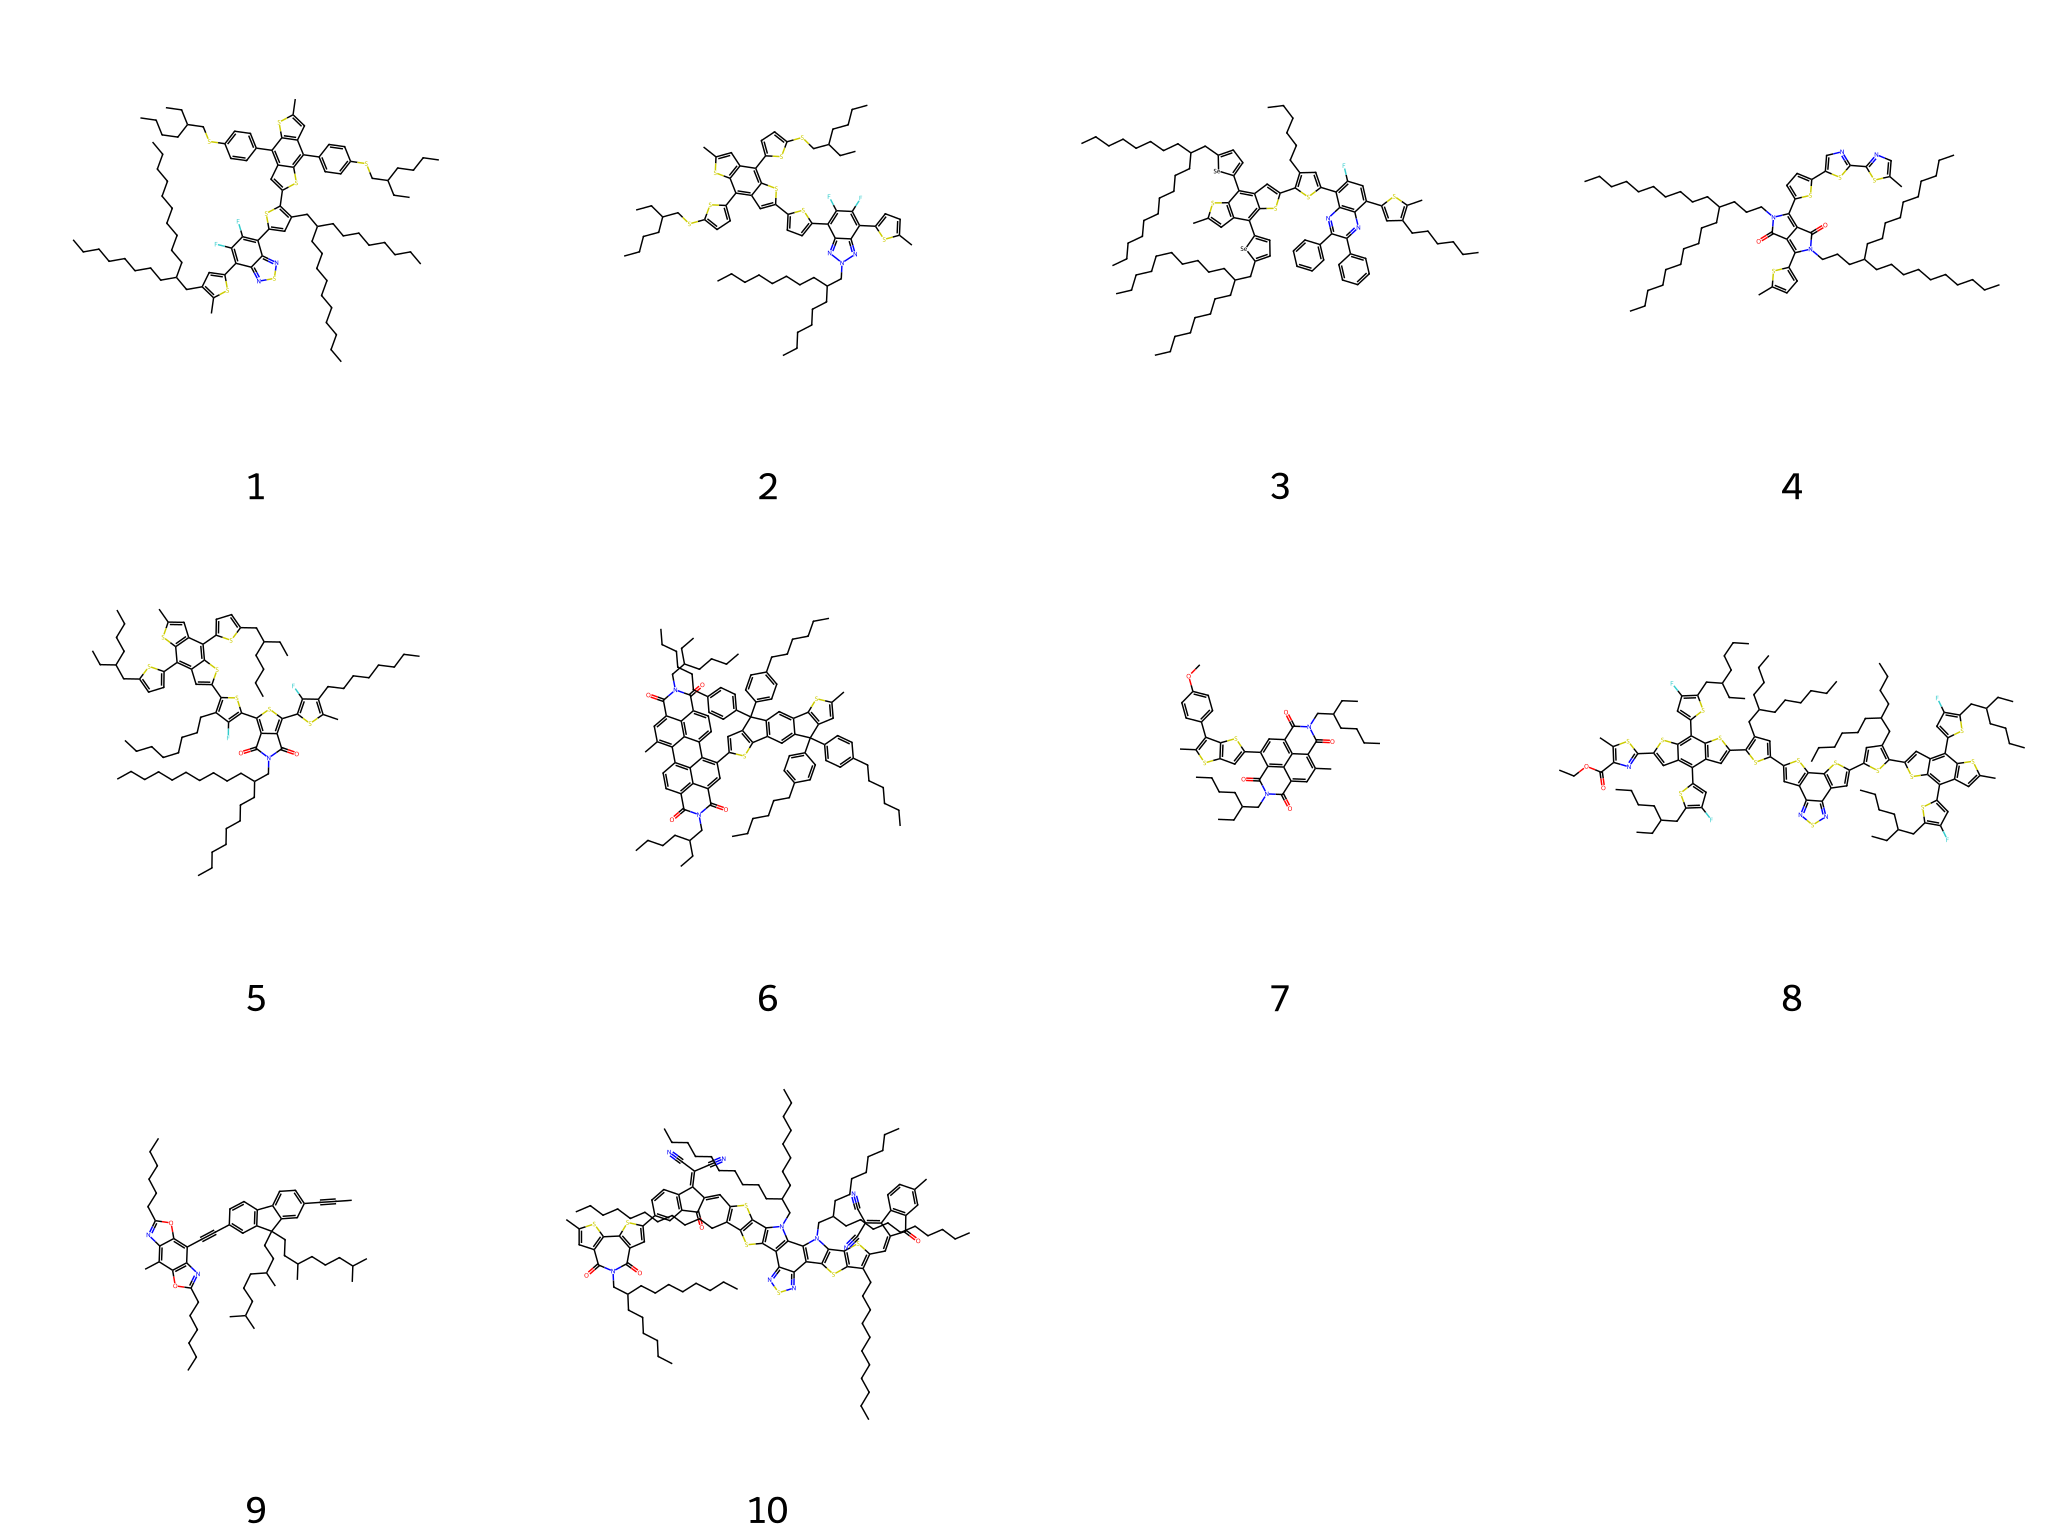

In [69]:
c_smiles = test_smiles
interval = 40
# 创建一个绘图选项对象
options = Draw.MolDrawOptions()
options.legendFontSize = 50
for i in range(0,len(c_smiles),interval):
    if (i+interval) <= len(c_smiles):
        sample_smiles = c_smiles[i:i+interval]
    else:
        sample_smiles = c_smiles[i:len(c_smiles)]
    sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
#     label = idx_list[i:i+40]
#     label = list(map(str, idx_list[i:i+40]))
    label = ['{:d}'.format(x+i+1) for x in range(40)]

    grid = Draw.MolsToGridImage(sample_mols,
                               molsPerRow=4,
                               subImgSize=(700,700),
                                legends = label,
                                drawOptions=options,
                               useSVG=True
                               )
grid

# path = '10polymers.svg'
# with open(path, 'w') as f_handle:
#         f_handle.write(grid.data)

In [72]:
test_set = df_exp[df_exp['smiles_monomer'].isin(test_smiles)]
test_idx = test_set.index
len(test_idx)

10

In [73]:
train_set = df_exp[~df_exp['smiles_monomer'].isin(test_smiles)]
train_idx = train_set.index
len(train_idx)

1313

# RDKit-209

In [78]:
smiles_list = df_all['smiles_monomer'].values
len(smiles_list)

1323

In [79]:
# proof and make a list of SMILES
c_smiles = []
for ds in smiles_list:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except:
        print('Invalid SMILES:', ds)
len(c_smiles)

1323

In [80]:
def RDKit208_MD(c_smiles):
    mols = [Chem.MolFromSmiles(i) for i in c_smiles] 
    desc_list = [x[0] for x in Descriptors._descList]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)
    rdkit_desc = [calc.CalcDescriptors(m) for m in mols]
    df_208 = pd.DataFrame(rdkit_desc,columns=desc_list)
    return df_208

In [81]:
rdkit208_md = RDKit208_MD(c_smiles)

In [83]:
rdkit208_md

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.353121,2.353121,1.287870,1.287870,0.608740,196.359,176.199,196.128572,74,0,...,0,0,0,0,0,0,0,1,2,0
1,2.323896,2.323896,1.288704,1.288704,0.485488,228.426,208.266,228.100643,80,0,...,1,0,0,0,0,0,0,1,3,0
2,2.313310,2.313310,1.230210,1.230210,0.463323,300.511,272.287,300.191172,114,0,...,0,0,0,0,0,0,0,1,4,0
3,12.542211,12.542211,0.175600,-0.175600,0.510163,350.549,324.341,350.137422,126,0,...,0,0,0,0,0,0,0,2,0,0
4,12.817589,12.817589,0.184059,-0.184059,0.318494,432.676,404.452,432.125143,150,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,16.198426,16.198426,0.043142,-0.162325,0.020131,2049.159,1901.991,2046.911663,742,0,...,0,0,0,0,0,2,0,6,18,0
1319,16.152914,16.152914,0.043203,-0.165095,0.020131,2049.159,1901.991,2046.911663,742,0,...,0,0,0,0,0,2,0,6,18,0
1320,17.721653,17.721653,0.055378,-0.984539,0.020092,2062.058,1913.882,2059.975226,758,0,...,0,0,0,0,0,0,0,6,24,0
1321,16.162433,16.162433,0.043735,-0.167596,0.020131,1987.041,1837.857,1984.983171,732,0,...,0,0,0,0,0,0,0,6,18,0


In [84]:
rdkit208_md.to_csv('data-augment-RDKit209-1323dp.csv', index = False)

# Read RDKit-209 features

In [90]:
rdkit_feature = pd.read_csv('data-augment-RDKit209-1323dp.csv')

features = pd.read_csv('../database-1096dp/raw/monomer-rdkit-54features-1096dp.csv')
rdkit_feature_list = features.columns[1:]

df_rdkit_screen = rdkit_feature[rdkit_feature_list]
df_rdkit_screen

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,FpDensityMorgan1,BalabanJ,PEOE_VSA1,PEOE_VSA11,PEOE_VSA12,...,NumAromaticHeterocycles,NumHAcceptors,fr_C_O,fr_aniline,fr_bicyclic,fr_halogen,fr_imide,fr_ketone_Topliss,fr_oxazole,fr_pyridine
0,2.353121,1.287870,1.287870,0.608740,196.359,1.153846,2.318302,0.000000,0.000000,0.0,...,1,1,0,0,0,0,0,0,0,0
1,2.323896,1.288704,1.288704,0.485488,228.426,1.214286,2.209145,0.000000,0.000000,0.0,...,1,2,0,0,0,0,0,0,0,0
2,2.313310,1.230210,1.230210,0.463323,300.511,0.857143,1.833656,0.000000,0.000000,0.0,...,1,1,0,0,0,0,0,0,0,0
3,12.542211,0.175600,-0.175600,0.510163,350.549,1.173913,2.074957,4.736863,0.000000,0.0,...,2,4,1,0,0,0,0,0,0,0
4,12.817589,0.184059,-0.184059,0.318494,432.676,0.964286,1.756705,4.736863,0.000000,0.0,...,3,5,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,16.198426,0.043142,-0.162325,0.020131,2049.159,0.375887,0.895645,9.134199,21.227283,0.0,...,11,21,2,0,17,0,0,2,0,0
1319,16.152914,0.043203,-0.165095,0.020131,2049.159,0.375887,0.896116,9.134199,21.227283,0.0,...,11,21,2,0,17,0,0,2,0,0
1320,17.721653,0.055378,-0.984539,0.020092,2062.058,0.361111,0.883992,9.134199,23.200932,0.0,...,10,20,2,0,17,2,0,2,0,0
1321,16.162433,0.043735,-0.167596,0.020131,1987.041,0.381295,0.942655,9.134199,11.566490,0.0,...,10,19,2,0,16,0,0,2,0,0


# MorganFP-1024

In [91]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts = AllChem.GetMorganFingerprintAsBitVect(mol,radius=3, nBits=1024)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)

In [92]:
Morgan_fpts = morgan_fpts(c_smiles)

Morgan_fpts.shape
#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(Morgan_fpts.shape[1]):
    feature_col.append("f_"+str(i))
    i+=1
Morgan_fingerprints = pd.DataFrame(data = Morgan_fpts, columns=feature_col)
Morgan_fingerprints

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1014,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1319,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
Morgan_fingerprints.to_csv('data-augment-ECFP6-1024keys.csv', index=False)

In [94]:
Morgan_fingerprints = pd.read_csv('data-augment-ECFP6-1024keys.csv')


# MACCS-167

In [95]:
def maccs_fpts(data):
    maccs_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts = MACCSkeys.GenMACCSKeys(mol)
        mfpts = np.array(fpts)
        maccs_fpts.append(mfpts)
    return np.array(maccs_fpts)

maccs_fpts = maccs_fpts(c_smiles)

maccs_fpts.shape


#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(maccs_fpts.shape[1]):
    feature_col.append("m_"+str(i))
    i+=1
MACCS_fingerprints = pd.DataFrame(data = maccs_fpts, columns=feature_col)
MACCS_fingerprints


,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,m_157,m_158,m_159,m_160,m_161,m_162,m_163,m_164,m_165,m_166
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
1319,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
1320,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
1321,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0


In [96]:
MACCS_fingerprints.to_csv('data-augment-MACCS-167keys.csv', index=False)

In [97]:
MACCS_fingerprints = pd.read_csv('data-augment-MACCS-167keys.csv')


# ML regression

In [98]:
def acc(y_test,y_pred):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = MSE ** 0.5
    R2 = r2_score(y_test,y_pred)
    r, p_value = pearsonr(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    return RMSE, R2, r, MAE

In [99]:
# X = pd.concat([df_rdkit_screen, Morgan_fingerprints, MACCS_fingerprints, df_dft], axis = 1)
X = pd.concat([Morgan_fingerprints, df_dft], axis = 1)
X

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1015,f_1016,f_1017,f_1018,f_1019,f_1020,f_1021,f_1022,f_1023,HOMO-LUMO(eV)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.78726
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.72032
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.19979
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.69964
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.66372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.94072
1319,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.93418
1320,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.96765
1321,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.02670


In [100]:
y = df_exp['bandgap(eV)']
y

0       1.930
1       1.820
2       1.760
3       1.920
4       1.890
        ...  
1318    1.333
1319    1.440
1320    1.442
1321    1.449
1322    1.437
Name: bandgap(eV), Length: 1323, dtype: float64

In [101]:
model = XGBRegressor()


In [102]:
X_train = X[X.index.isin(train_idx)]
X_test = X[~X.index.isin(train_idx)]
len(X_train), len(X_test)

(1313, 10)

In [103]:
y_train = y[y.index.isin(train_idx)]
y_test = y[~y.index.isin(train_idx)]
len(y_train), len(y_test)

(1313, 10)

In [104]:
foldername = 'xgb-10fold-cv-average'
os.makedirs(foldername, exist_ok=True)


In [105]:
# 10fold-CV average
xfold=10
kf = KFold(n_splits=xfold, shuffle=True, random_state=42)

In [106]:
scores_list = []

# save index for train and test of each fold
train_idx_list = []
test_idx_list = []

In [107]:
print('Start training...')

for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_kf_train, X_kf_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_kf_train, y_kf_test = y_train.iloc[train_index], y_train.iloc[test_index]
    train_idx_list.append(train_index)
    test_idx_list.append(test_index)
    
    # 训练模型
    model.fit(X_kf_train, y_kf_train)
  
    # 保存模型
    model_filename = foldername + f'/model_fold_{fold_idx + 1}.pkl'
    joblib.dump(model, model_filename)


Start training...


In [108]:
models = []
for fold_idx in range(xfold):
    model_filename = foldername + f'/model_fold_{fold_idx + 1}.pkl'
    model = joblib.load(model_filename)
    models.append(model)
    
len(models)

10

In [109]:
predictions = []
for i in range(xfold):
    model = models[i]
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

In [110]:
df_predictions = pd.DataFrame(predictions)
df_predictions = df_predictions.T
df_predictions['mean'] = df_predictions.iloc[:,:4].mean(axis = 1)

In [111]:
df_predictions

,0,1,2,3,4,5,6,7,8,9,mean
0,1.923625,1.879793,1.973083,1.865119,1.994838,2.077510,1.908615,1.929638,1.992862,1.901031,1.910405
1,1.937366,1.963159,1.963238,1.985557,2.000161,1.960795,1.980104,1.962863,1.936337,1.989811,1.962330
2,1.641094,1.648735,1.609981,1.599590,1.693850,1.682586,1.648207,1.654686,1.652498,1.678771,1.624850
3,1.457654,1.495510,1.506172,1.516242,1.502410,1.500547,1.495530,1.499573,1.454404,1.441018,1.493895
4,1.751184,1.794035,1.731143,1.682081,1.737187,1.691059,1.839355,1.814180,1.792413,1.729805,1.739610
5,1.567052,1.491395,1.568305,1.517834,1.580036,1.642002,1.579213,1.695817,1.633662,1.685591,1.536147
6,1.612187,1.683157,1.717731,1.654047,1.692060,1.683777,1.762754,1.675423,1.648149,1.647091,1.666780
7,1.749767,1.838431,1.849670,1.861518,1.766119,1.924355,1.837583,1.813491,1.805999,1.822769,1.824847
8,2.697642,2.550362,2.695025,2.644869,2.712046,2.681680,2.682707,2.699096,2.733142,2.695647,2.646974
9,1.449577,1.453979,1.439229,1.467997,1.440868,1.399415,1.421533,1.465792,1.443983,1.421439,1.452696


In [112]:
RMSE_test, R2_test, r_test, MAE_test = acc(y_test,df_predictions['mean'])
scores=[]
scores.append([RMSE_test, R2_test, r_test, MAE_test])
scores_df = pd.DataFrame(scores, columns = ['RMSE', 'R2', 'r', 'MAE'])
scores_df.round(3)

,RMSE,R2,r,MAE
0,0.22,0.694,0.845,0.192


In [113]:
y_pred = df_predictions['mean']
df_out = pd.DataFrame()
df_out['y_real'] = y_test.values
df_out['y_pred'] = y_pred
df_out['error'] = df_out['y_real'] - df_out['y_pred']
df_out['abs_error'] =  abs(df_out['y_real'] - df_out['y_pred'])

df_out = df_out.round(3)
df_out
# df_out.to_csv('10polymers-prediction.csv', index=True)

,y_real,y_pred,error,abs_error
0,1.730,1.910,-0.180,0.180
1,1.890,1.962,-0.072,0.072
2,1.450,1.625,-0.175,0.175
3,1.310,1.494,-0.184,0.184
4,1.900,1.740,0.160,0.160
5,1.960,1.536,0.424,0.424
6,2.020,1.667,0.353,0.353
7,2.010,1.825,0.185,0.185
8,2.760,2.647,0.113,0.113
9,1.381,1.453,-0.072,0.072


# Load XGBoost-2 model trained with 1096 data points

In [114]:
foldername = '../database-1096dp/02-ML-oligomer-model/6Model-DFT-MorganFP/xgb-10fold-10subfold/'

xfold=10
models = []
for fold_idx in range(xfold):
    for fold_idx_sub in range(xfold):
        model_filename =foldername + f'/model_fold_{fold_idx + 1}_subfold_{fold_idx_sub + 1}.pkl'
        model = joblib.load(model_filename)
        models.append(model)

len(models)

100

In [115]:
X_test.shape, y_test.shape

((10, 1025), (10,))

In [116]:
scores = []
all_fold_pred = []

for i in range(xfold):
   
    predictions = []
    
    for j in range(xfold):
        model = models[i*xfold+j]     
               
        y_pred = model.predict(X_test)
        predictions.append(y_pred)
        
#         print('model idx: ',i*xfold+j)
        
    df_predictions = pd.DataFrame(predictions)
    df_predictions = df_predictions.T
    df_predictions['mean'] = df_predictions.iloc[:,:4].mean(axis = 1)
    
    all_fold_pred.append(df_predictions['mean'].values)
    
    RMSE_test, R2_test, r_test, MAE_test = acc(y_test,df_predictions['mean'])
    scores.append([RMSE_test, R2_test, r_test, MAE_test])


scores_df = pd.DataFrame(scores, columns = ['RMSE', 'R2', 'r', 'MAE'])
scores_df.loc['mean'] = scores_df.iloc[:xfold,:].mean()
scores_df.loc['std'] = scores_df.iloc[:xfold,:].std()
# scores_df.round(3)
scores_df.round(3)

df_all_pred = pd.DataFrame(all_fold_pred)
df_all_pred = df_all_pred.T
df_all_pred['mean'] = df_all_pred.iloc[:,:4].mean(axis = 1)

df_all_pred


RMSE_test, R2_test, r_test, MAE_test = acc(y_test,df_all_pred['mean'])
scores=[]
scores.append([RMSE_test, R2_test, r_test, MAE_test])
scores_df = pd.DataFrame(scores, columns = ['RMSE', 'R2', 'r', 'MAE'])
scores_df.round(3)

,RMSE,R2,r,MAE
0,0.346,0.243,0.531,0.309


In [117]:
y_pred = df_all_pred['mean']
df_out = pd.DataFrame()
df_out['y_real'] = y_test.values
df_out['y_pred'] = y_pred
df_out['error'] = df_out['y_real'] - df_out['y_pred']
df_out['abs_error'] =  abs(df_out['y_real'] - df_out['y_pred'])

df_out = df_out.round(3)
# df_out.to_csv('10polymers-prediction.csv', index=True)
df_out


,y_real,y_pred,error,abs_error
0,1.730,1.935,-0.205,0.205
1,1.890,2.078,-0.188,0.188
2,1.450,1.669,-0.219,0.219
3,1.310,1.576,-0.266,0.266
4,1.900,1.708,0.192,0.192
5,1.960,1.486,0.474,0.474
6,2.020,1.649,0.371,0.371
7,2.010,1.820,0.190,0.190
8,2.760,2.064,0.696,0.696
9,1.381,1.668,-0.287,0.287
